In [1]:
# project: p1
# submitter: Smwells3
# partner: none
# hours: 15

In [2]:
from subprocess import check_output
import pandas as pd
from pandas import DataFrame as df, Series
import matplotlib 
from matplotlib import pyplot as plt
import json, os, random, time

In [3]:
cd repo

/home/seanwells/cs320/s21/p1/repo


In [4]:
#q1
output = check_output(["git", "log"])
string = str(output, "utf8")
split_text = string.splitlines()
count = 0
for line in split_text:
    if "commit" in line:
        count += 1
count 

8

In [5]:
#q2
author_dict = {}
for line in split_text:
    if "Author" in line:
        author = line.split()[1]
        if author in author_dict:
            author_dict[author] += 1
        else:
            author_dict[author] = 1
author_dict

{'Steve': 3, 'Ada': 3, 'Linus': 2}

Text(0.5, 0, '')

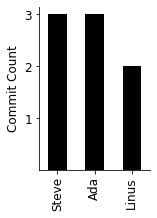

In [6]:
#q3
frame = {}
frame["Author"] = []
frame["count"] = []
for author in author_dict:
    frame["Author"].append(author)
for author in author_dict:
    frame["count"].append(author_dict[author])
    
author_data = df(frame)
author_data = author_data.set_index("Author")
ax = author_data.plot.bar(figsize=(2,3),color="k", legend=False, fontsize=12, yticks=(1,2,3))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Commit Count", fontsize=12)
ax.set_xlabel("")

In [7]:
commits = []
for line in split_text:
    if "commit" in line:
        commits.append(line.split()[1])
commits.reverse()

In [8]:
authors = []
for line in split_text:
    if "Author" in line:
        authors.append(line.split()[1])
authors.reverse()
#in prep of #8

In [9]:
def line_count():    
    output = check_output(["cat", "wc.py"])
    string = str(output, "utf8")
    split_text = string.splitlines()
    line_lengths.append(len(split_text))

line_lengths = []
for commit in commits:
    check_output(["git", "checkout", commit])
    line_count()

In [10]:
#q4
line_lengths

[21, 35, 35, 39, 40, 40, 40, 43]

[21, 35, 35, 39, 40, 40, 40, 43]

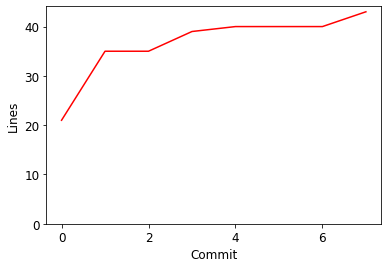

In [11]:
#q5
length_series = Series(line_lengths)
ax = length_series.plot.line(color="r", fontsize=12, yticks=(0,10,20,30,40), xticks=(0,2,4,6))
ax.set_xlabel("Commit", fontsize=12)
ax.set_ylabel("Lines", fontsize=12)
line_lengths

In [12]:
def run_wc(body, commit=None):
    if commit == None:
        pass
    else:
        check_output(["git", "checkout", commit], universal_newlines=True)
    file = open("test.txt", "w")
    file.write(body)
    file.close()
    output = check_output(["python3", "wc.py", "test.txt", "ALL"])
    string = str(output, "utf8")
    return(json.loads(string))

In [13]:
# test inputs to exercise wc.py
# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""
# expected result: {'A': 2, 'B': 1, 'C': 1}
test2 = """A B
A C
"""
# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [14]:
#q6
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [15]:
#q7
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [16]:
def test_table(body, expected):
    test_dict = {}
    test_dict["commit"] = commits
    test_dict["author"] = authors
    test_dict["pass"] = []
    for commit in commits:
        try:
            dictionary = run_wc(body, commit)
        except:
            dictionary = "crashed"
        if dictionary == expected:
            test_dict["pass"].append("True")
        else:
            test_dict["pass"].append("False")
    return df(test_dict)

In [17]:
#q8
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [18]:
#q9
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [19]:
#q10
test_table(test3, {'A': 2, 'B': 1, 'C': 1})
#I'd say that this test is the most useful for evaluating the wc.py program since it incorporates a mix of upper and lower case words to test the program 
#also had the most number of commits fail to narrow the selection down

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [20]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}
alphabet = "abcdefghijklmnopqrstuvwxyz"
def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    unique_words = []
    for length in range(uniq_words): 
        word = ""
        for number in range(word_size): 
            word = word + random.choice(alphabet)
        unique_words.append(word)
    input_str = ""
    for num in range(total_words): 
        input_str = input_str + " " + random.choice(unique_words)
    times_wc = {}
    for version in versions:
        time1 = time.time()
        run_wc(input_str, versions[version])
        time2 = time.time()
        total_time = time2 - time1
        times_wc[version] = total_time
    return df(Series(times_wc))

def graph_time(uniq_words, total_words):    
    example_df = time_run_sec(uniq_words, total_words)
    example_df *= 1000
    ax = example_df.plot.barh(figsize=(5,2), color="k", legend=False, fontsize=12, logx=True)
    ax.invert_yaxis()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Exec Time (ms)", fontsize=12)

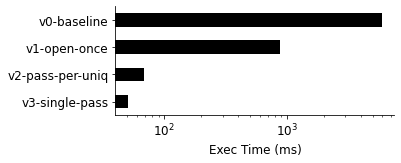

In [21]:
#q11
graph_time(100,5000)

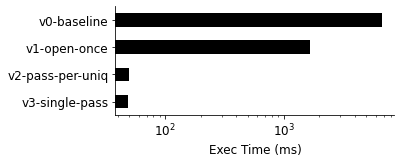

In [22]:
#q12
graph_time(1,5000)
#It appears that v3 does better than v2 in situations where a large number of unique words are used in wc.py

In [23]:
def single_run_wc(uniq_words, total_words, version, word_size=6):
    unique_words = []
    check_output(["git", "checkout", versions[version]])
    for length in range(round(uniq_words)): 
        word = ""
        for number in range(word_size): 
            word = word + random.choice(alphabet)
        unique_words.append(word)
    input_str = ""
    for num in range(total_words): 
        input_str = input_str + " " + random.choice(unique_words)
    time1 = time.time()
    run_wc(input_str, versions[version])
    time2 = time.time()
    total_time = time2 - time1
    return total_time

In [24]:
def performance_check(version):
    check_output(["git", "checkout", versions[version]])
    performance = pd.DataFrame(index=[1000, 2000, 5000, 10000], columns=[10, 5, 1])
    performance.index.name = "total words"
    performance.columns.name = "percent uniq"
    for column in performance:
        for index in performance.index:
            percent = column/100
            performance[column][index] = single_run_wc((percent * index), index, version, 6)
    return performance

<AxesSubplot:title={'center':'version 3'}, xlabel='total words'>

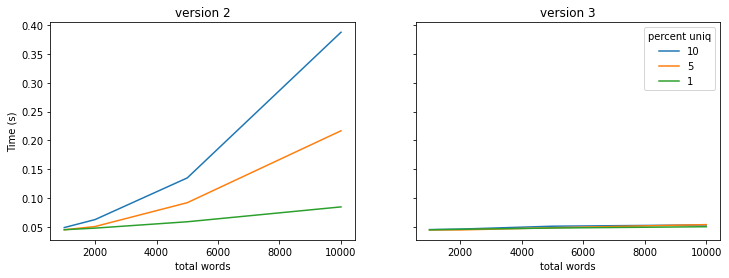

In [25]:
#q13
v2 = performance_check("v2-pass-per-uniq")
v3 = performance_check("v3-single-pass")
fig, axes = plt.subplots(ncols = 2, sharey = True, figsize=(12,4))
v2.plot.line(ax=axes[0], legend=False, title="version 2", ylabel="Time (s)")
v3.plot.line(ax=axes[1], title="version 3")

In [26]:
class Commit:
    def __init__(self, commit_hex, author, message):
        self.commit_hex = str(commit_hex)
        self.author = str(author)
        self.message = str(message)
        
    def __str__(self):
        return f"{self.commit_hex}[{self.author}]: {self.message}"
        
class Repo:
    def __init__(self):
        self.repo_history = {}
        self.repo_list = []
    
    def commit(self, commit_hex, author, message):
        commit = Commit(commit_hex, author, message)
        self.repo_history[commit_hex] = commit
        self.repo_list.append(commit)
        return commit
        
    def __getitem__(self, lookup):
        if type(lookup) == str:
            lookup = lookup.upper().strip()
            curr_commit = self.repo_history[lookup]
        else:
            index = int(lookup)
            curr_commit = self.repo_list[index]
        return str(curr_commit)

In [27]:
#q14
repo = Repo()
c1 = repo.commit("A39DE2", "Aarushi", "created the repo")
c2 = repo.commit("D1E9C5", "Ben", "wrote some code")
c3 = repo.commit("AA0912", "Emma", "added a readme")
c4 = repo.commit("B143D0", "Hunter", "made some tests")
c5 = repo.commit("F0148D", "Jaime", "fixed a bug")
c6 = repo.commit("B978EE", "Wendy", "optimized the code")
c1.commit_hex, c2.author, c3.message, c4.commit_hex, c5.author, c6.message

('A39DE2', 'Ben', 'added a readme', 'B143D0', 'Jaime', 'optimized the code')

In [28]:
#q15
str(c1), str(repo[1]), str(repo[-1])

('A39DE2[Aarushi]: created the repo',
 'D1E9C5[Ben]: wrote some code',
 'B978EE[Wendy]: optimized the code')

In [29]:
#q16
str(repo["F0148D"]), str(repo["b143d0"]), str(repo["  AA0912  "])

('F0148D[Jaime]: fixed a bug',
 'B143D0[Hunter]: made some tests',
 'AA0912[Emma]: added a readme')